In [5]:
import numpy as np
import pandas as pd
from pylab import plt

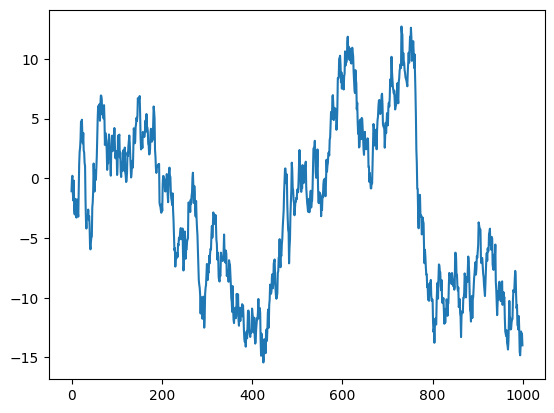

In [18]:
np.random.seed(123)

def ar_model(alpha, n):
    ys = []
    for i in range(n):
        if i == 0:
            ys.append(np.random.randn())
        else:
            ys.append(ys[i-1] * alpha + np.random.randn())

    return ys

# x = np.random.randn(1000).cumsum()
x = ar_model(0.99, 1000)
plt.plot(x)

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as hw
model = hw(
    x,
    trend = 'additive',
)

res = model.fit()
res.summary()


Dep. Variable:,endog,No. Observations:,1000
Model:,ExponentialSmoothing,SSE,1004.534
Optimized:,True,AIC,12.523
Trend:,Additive,BIC,32.154
Seasonal:,None,AICC,12.608
Seasonal Periods:,None,Date:,"Thu, 14 Dec 2023"
Box-Cox:,False,Time:,00:18:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


AttributeError: 'HoltWintersResults' object has no attribute 'slope'

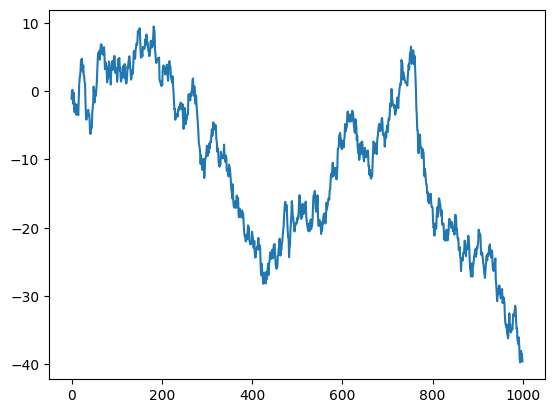

In [12]:
plt.plot(res.level)
plt.plot(res.slope)